x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300: loss 0.999971
iteration 1 / 300: loss 0.960034
iteration 2 / 300: loss 0.941739
iteration 3 / 300: loss 0.928193
iteration 4 / 300: loss 0.917165
iteration 5 / 300: loss 0.907849
iteration 6 / 300: loss 0.898672
iteration 7 / 300: loss 0.891810
iteration 8 / 300: loss 0.886345
iteration 9 / 300: loss 0.879006
iteration 10 / 300: loss 0.873583
iteration 11 / 300: loss 0.869286
iteration 12 / 300: loss 0.864722
iteration 13 / 300: loss 0.861121
iteration 14 / 300: loss 0.854917
iteration 15 / 300: loss 0.851334
iteration 16 / 300: loss 0.847153
iteration 17 / 300: loss 0.843855
iteration 18 / 300: loss 0.840252
iteration 19 / 300: loss 0.838141
iteration 20 / 300: loss 0.834823
iteration 21 / 300: loss 0.832414
iteration 22 / 300: loss 0.830949
iteration 23 / 300: loss 0.827404
iteration 24 / 300: loss 0.825975
iteration 25 / 300: loss 0.823708
iteration 26 / 300: loss 0.821816
iteration 27 / 300: loss 0.818795
iter

iteration 236 / 300: loss 0.782624
iteration 237 / 300: loss 0.783086
iteration 238 / 300: loss 0.783141
iteration 239 / 300: loss 0.782822
iteration 240 / 300: loss 0.782461
iteration 241 / 300: loss 0.782924
iteration 242 / 300: loss 0.781495
iteration 243 / 300: loss 0.782036
iteration 244 / 300: loss 0.781663
iteration 245 / 300: loss 0.782714
iteration 246 / 300: loss 0.784458
iteration 247 / 300: loss 0.783363
iteration 248 / 300: loss 0.781825
iteration 249 / 300: loss 0.784151
iteration 250 / 300: loss 0.781103
iteration 251 / 300: loss 0.781729
iteration 252 / 300: loss 0.782069
iteration 253 / 300: loss 0.782892
iteration 254 / 300: loss 0.781987
iteration 255 / 300: loss 0.782197
iteration 256 / 300: loss 0.782346
iteration 257 / 300: loss 0.782786
iteration 258 / 300: loss 0.782751
iteration 259 / 300: loss 0.780619
iteration 260 / 300: loss 0.784580
iteration 261 / 300: loss 0.780445
iteration 262 / 300: loss 0.780613
iteration 263 / 300: loss 0.783769
iteration 264 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

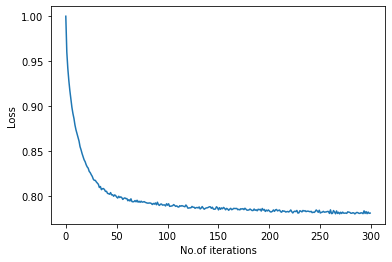

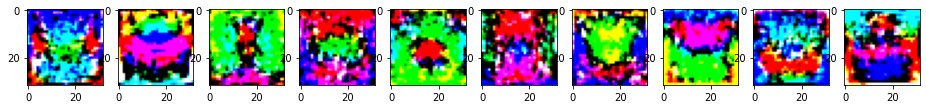

x_train-> (50000, 3072)
train_acc = 0.7560644444444444
train_loss = 0.7809448887589691
x_test-> (10000, 3072)
test_acc = 0.749
test_loss = 0.7867270854419913


In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train))# Classes

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr
iterations =300
lr =1.8e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
#indices = np.arange(Ntr)
#rng.shuffle(indices)
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    y_pred=x.dot(w1)+b1
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg *(np.sum(w1*w1))
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred)+reg*w1
    db1=dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
print("x_train->",x_t.shape)
y_pred=x_t.dot(w1)+b1

train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('train_acc =',train_acc)
train_loss=1./Ntr*np.square(y_pred - y_train).sum() + reg *(np.sum(w1*w1))
print('train_loss =',train_loss)

x_t=x_test
print("x_test->",x_t.shape)
y_pred=x_t.dot(w1)+b1
test_acc=1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('test_acc =',test_acc)
test_loss=1./Nte*np.square(y_pred - y_test).sum() + reg *(np.sum(w1*w1))
print('test_loss =',test_loss)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300: loss 1.000021
iteration 1 / 300: loss 0.928158
iteration 2 / 300: loss 0.908004
iteration 3 / 300: loss 0.911330
iteration 4 / 300: loss 0.961888
iteration 5 / 300: loss 1.012959
iteration 6 / 300: loss 1.133663
iteration 7 / 300: loss 1.354758
iteration 8 / 300: loss 1.149690
iteration 9 / 300: loss 0.985480
iteration 10 / 300: loss 0.907720
iteration 11 / 300: loss 0.882952
iteration 12 / 300: loss 0.872854
iteration 13 / 300: loss 0.868399
iteration 14 / 300: loss 0.864920
iteration 15 / 300: loss 0.861666
iteration 16 / 300: loss 0.858648
iteration 17 / 300: loss 0.854882
iteration 18 / 300: loss 0.853426
iteration 19 / 300: loss 0.851247
iteration 20 / 300: loss 0.854203
iteration 21 / 300: loss 0.860416
iteration 22 / 300: loss 0.848776
iteration 23 / 300: loss 0.845827
iteration 24 / 300: loss 0.843046
iteration 25 / 300: loss 0.843482
iteration 26 / 300: loss 0.841500
iteration 27

iteration 235 / 300: loss 0.750823
iteration 236 / 300: loss 0.748451
iteration 237 / 300: loss 0.744614
iteration 238 / 300: loss 0.745435
iteration 239 / 300: loss 0.747973
iteration 240 / 300: loss 0.746767
iteration 241 / 300: loss 0.750187
iteration 242 / 300: loss 0.751991
iteration 243 / 300: loss 0.755252
iteration 244 / 300: loss 0.750038
iteration 245 / 300: loss 0.743516
iteration 246 / 300: loss 0.742419
iteration 247 / 300: loss 0.743255
iteration 248 / 300: loss 0.745913
iteration 249 / 300: loss 0.751683
iteration 250 / 300: loss 0.749229
iteration 251 / 300: loss 0.740102
iteration 252 / 300: loss 0.740752
iteration 253 / 300: loss 0.741978
iteration 254 / 300: loss 0.746588
iteration 255 / 300: loss 0.747327
iteration 256 / 300: loss 0.750084
iteration 257 / 300: loss 0.742546
iteration 258 / 300: loss 0.739614
iteration 259 / 300: loss 0.740676
iteration 260 / 300: loss 0.744149
iteration 261 / 300: loss 0.738117
iteration 262 / 300: loss 0.738948
iteration 263 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

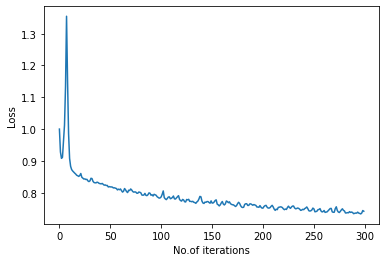

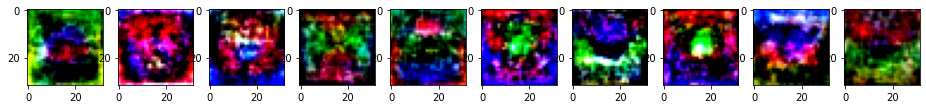

x_train-> (50000, 3072)
train_acc = 0.7809688888888889
train_loss = 0.7397370717790586
x_test-> (10000, 3072)
test_acc = 0.7627555555555555
test_loss = 0.7617063911772854


In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train))# Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2=std*np.random.randn(H,K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    
plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
print("x_train->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('train_acc =',train_acc)
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
print('train_loss =',train_loss)

x_t=x_test
print("x_test->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
test_acc=1.0 -1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('test_acc =',test_acc)
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
print('test_loss =',test_loss)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300: loss 1.000014
iteration 1 / 300: loss 0.934088
iteration 2 / 300: loss 0.928348
iteration 3 / 300: loss 0.991666
iteration 4 / 300: loss 1.144828
iteration 5 / 300: loss 1.131200
iteration 6 / 300: loss 0.970362
iteration 7 / 300: loss 0.932217
iteration 8 / 300: loss 0.917899
iteration 9 / 300: loss 0.889475
iteration 10 / 300: loss 0.879643
iteration 11 / 300: loss 0.871810
iteration 12 / 300: loss 0.875349
iteration 13 / 300: loss 0.866642
iteration 14 / 300: loss 0.873416
iteration 15 / 300: loss 0.863393
iteration 16 / 300: loss 0.853514
iteration 17 / 300: loss 0.868522
iteration 18 / 300: loss 0.873977
iteration 19 / 300: loss 0.878060
iteration 20 / 300: loss 0.864790
iteration 21 / 300: loss 0.875533
iteration 22 / 300: loss 0.864210
iteration 23 / 300: loss 0.849911
iteration 24 / 300: loss 0.841153
iteration 25 / 300: loss 0.844001
iteration 26 / 300: loss 0.852360
iteration 27

iteration 237 / 300: loss 0.767828
iteration 238 / 300: loss 0.751388
iteration 239 / 300: loss 0.773148
iteration 240 / 300: loss 0.762322
iteration 241 / 300: loss 0.767342
iteration 242 / 300: loss 0.772013
iteration 243 / 300: loss 0.773666
iteration 244 / 300: loss 0.765181
iteration 245 / 300: loss 0.779883
iteration 246 / 300: loss 0.767740
iteration 247 / 300: loss 0.783133
iteration 248 / 300: loss 0.765841
iteration 249 / 300: loss 0.761118
iteration 250 / 300: loss 0.773610
iteration 251 / 300: loss 0.768351
iteration 252 / 300: loss 0.757437
iteration 253 / 300: loss 0.760578
iteration 254 / 300: loss 0.774351
iteration 255 / 300: loss 0.741267
iteration 256 / 300: loss 0.773424
iteration 257 / 300: loss 0.757487
iteration 258 / 300: loss 0.756673
iteration 259 / 300: loss 0.765692
iteration 260 / 300: loss 0.771112
iteration 261 / 300: loss 0.751307
iteration 262 / 300: loss 0.745387
iteration 263 / 300: loss 0.752989
iteration 264 / 300: loss 0.760284
iteration 265 / 300:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

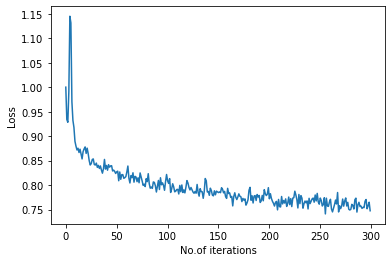

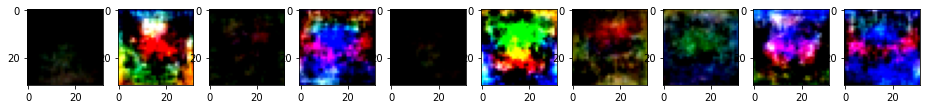

x_train-> (50000, 3072)
train_acc = 0.7665044444444444
train_loss = 0.8620621075189432
x_test-> (10000, 3072)
test_acc = 0.7602888888888889
test_loss = 0.8580658112226468


In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train))# Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2=std*np.random.randn(H,K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = 500
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    print('iteration %d / %d: loss %f'%(t,iterations,loss))
    
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    
plt.plot(loss_history)
plt.xlabel("No.of iterations")
plt.ylabel("Loss")
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
print("x_train->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

train_acc=1.0 - 1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('train_acc =',train_acc)
train_loss=1.0 -1/(81*Ntr)*np.square(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1)).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
print('train_loss =',train_loss)

x_t=x_test
print("x_test->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2
test_acc=1.0-1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
print('test_acc =',test_acc)
test_loss=1.0-1/(81*Nte)*np.square((np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
print('test_loss =',test_loss)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

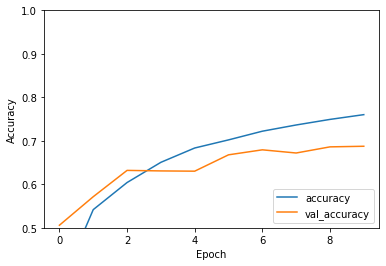

In [38]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from tensorflow import keras
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=10,batch_size=50,
                   validation_data=(x_test, y_test_categorical))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train_categorical, verbose=2)

print("test_loss=",test_loss)
print("test_acc=",test_acc)
print("train_loss=",train_loss)
print("train_acc=",train_acc)